⏳ Loading datasets...
🔄 Merging datasets...
✅ Data Loaded Successfully. Shape: (421570, 16)
Initial Missing Values:
 Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64
🧹 Starting Preprocessing...
   ⚠️ Warning: Dataset contains 1285 records with negative sales (Returns).
✅ Cleaning Complete.
⚙️ Engineering Features...

Missing Values After Cleaning:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Year            0
Month      

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Quarter,DayOfYear
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,1,36
143,1,2,2010-02-05,50605.27,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,1,36
286,1,3,2010-02-05,13740.12,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,1,36
429,1,4,2010-02-05,39954.04,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,1,36
572,1,5,2010-02-05,32229.38,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,1,36


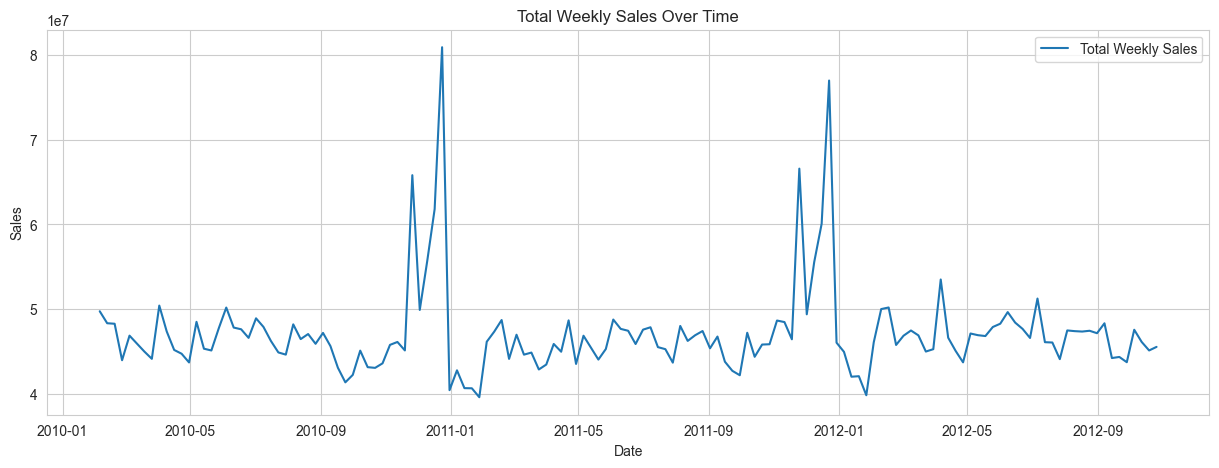

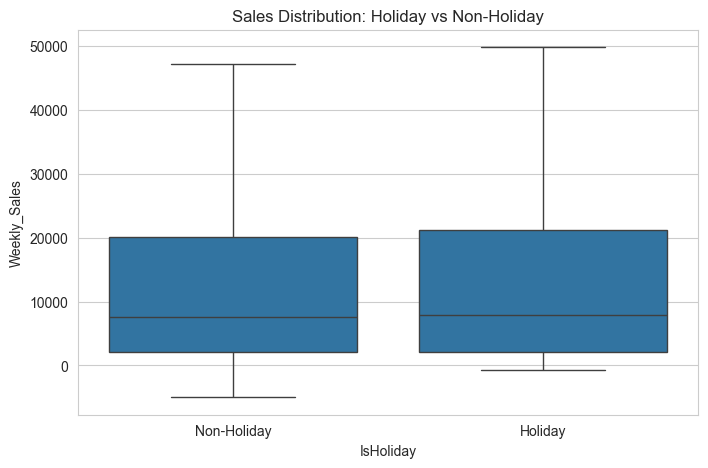

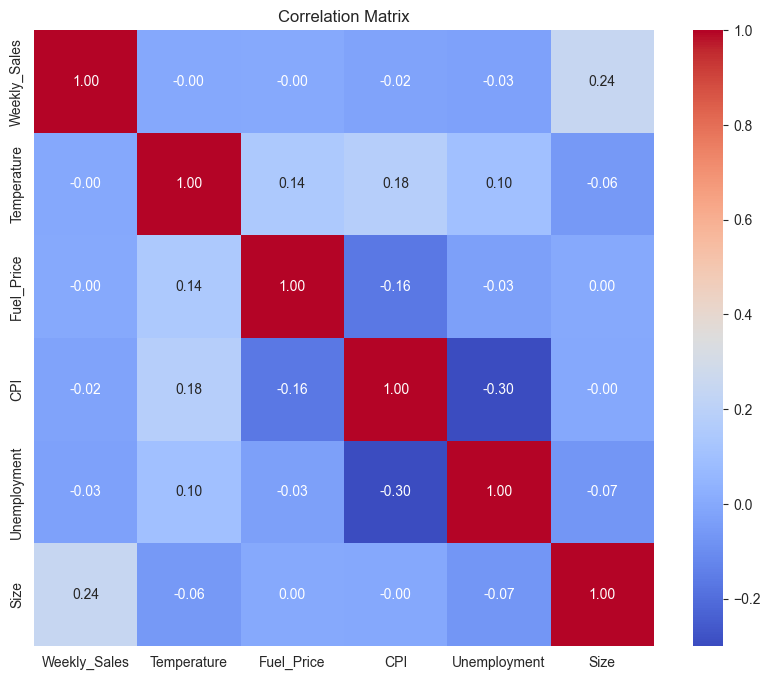

✅ Cleaned data saved to ../data/processed/clean_retail_data.csv


In [ ]:

# %% [markdown]
# # 🧹 Step 1: Data Cleaning & Exploratory Data Analysis (EDA)
# **Project:** Integrated Retail Analytics
#
# **Objective:** # 1. Load and merge the raw datasets (Stores, Features, Sales).
# 2. Handle missing values (especially MarkDowns).
# 3. Visualize sales trends, seasonality, and correlations.
# 4. Save the clean dataset for Anomaly Detection.

# %% [markdown]
# ## 1. Setup & Imports

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add src to path to import our modules
sys.path.append(os.path.abspath('..'))

from src.data_loader import RetailDataLoader
from src.preprocessing import RetailPreprocessor

sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

# %% [markdown]
# ## 2. Load Data

# %%
# Initialize Loader
loader = RetailDataLoader(data_path="../data/raw")
raw_df = loader.load_data()

# Check initial state
print("Initial Missing Values:\n", raw_df.isnull().sum())

# %% [markdown]
# ## 3. Data Cleaning
# We use the `RetailPreprocessor` class to handle MarkDowns (filling with 0) and Date conversion.

# %%
processor = RetailPreprocessor(raw_df)
df_clean = processor.clean_data()
df_clean = processor.feature_engineering()

# Check after cleaning
print("\nMissing Values After Cleaning:\n", df_clean.isnull().sum())
display(df_clean.head())

# %% [markdown]
# ## 4. Exploratory Data Analysis (EDA)

# %% [markdown]
# ### 4.1 Sales Over Time (Seasonality)
# Let's see the global sales trend.

# %%
plt.figure(figsize=(15, 5))
daily_sales = df_clean.groupby('Date')['Weekly_Sales'].sum()
plt.plot(daily_sales, label='Total Weekly Sales', color='#1f77b4')
plt.title('Total Weekly Sales Over Time')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.legend()
plt.show()

# %% [markdown]
# **Observation:** Notice the massive spikes? Those are likely Thanksgiving/Christmas holidays. This confirms we need **Holiday** features for forecasting.

# %% [markdown]
# ### 4.2 Impact of Holidays
# Do sales actually increase during holidays?

# %%
plt.figure(figsize=(8, 5))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df_clean, showfliers=False)
plt.title('Sales Distribution: Holiday vs Non-Holiday')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

# %% [markdown]
# ### 4.3 Correlation Heatmap (Economic Indicators)
# How do Fuel Price, CPI, and Unemployment affect sales?

# %%
corr_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']
corr = df_clean[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# %% [markdown]
# ## 5. Save Processed Data
# Saving the merged and clean data for the next step (Anomaly Detection).

# %%
save_path = "../data/processed/clean_retail_data.csv"
df_clean.to_csv(save_path, index=False)
print(f"✅ Cleaned data saved to {save_path}")